**About Cifar10 Dataset:**


The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.



Here are the classes in the dataset, as well as 10 random images from each:


1.airplane

2.automobile

3.bird

4.cat

5.deer

6.dog

7.frog

8.horse

9.ship

10.truck


In [1]:
# importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()    # loading the dataset

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
# checking the shape
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

In [7]:
x_train[20]

array([[[153, 157, 155],
        [174, 180, 188],
        [155, 165, 172],
        ...,
        [122, 125, 123],
        [138, 143, 141],
        [ 97, 101,  97]],

       [[160, 163, 165],
        [164, 170, 180],
        [150, 159, 169],
        ...,
        [137, 135, 129],
        [160, 161, 157],
        [103, 109, 107]],

       [[140, 143, 147],
        [147, 152, 166],
        [136, 145, 158],
        ...,
        [104, 103,  99],
        [125, 128, 125],
        [ 93, 102, 101]],

       ...,

       [[175, 177, 179],
        [170, 172, 174],
        [170, 172, 174],
        ...,
        [193, 203, 212],
        [197, 206, 214],
        [199, 204, 213]],

       [[174, 177, 181],
        [173, 176, 180],
        [171, 174, 178],
        ...,
        [200, 208, 216],
        [202, 209, 218],
        [208, 212, 221]],

       [[168, 173, 180],
        [164, 169, 175],
        [166, 171, 177],
        ...,
        [204, 209, 217],
        [204, 208, 217],
        [206, 210, 219]]

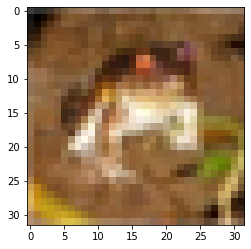

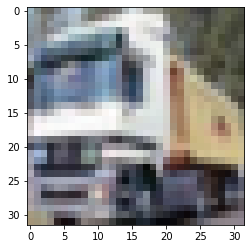

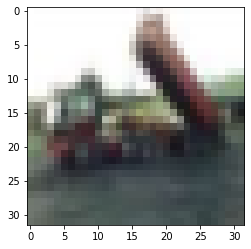

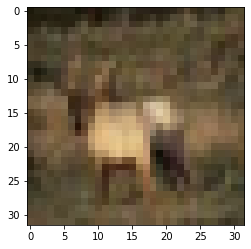

In [9]:
for i in range(4):
  plt.imshow(x_train[i])
  plt.show()

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
x_train=x_train/255
x_test=x_test/255

In [13]:
x_train[3]

array([[[0.10980392, 0.09803922, 0.03921569],
        [0.14509804, 0.13333333, 0.0745098 ],
        [0.14901961, 0.1372549 , 0.07843137],
        ...,
        [0.29803922, 0.2627451 , 0.15294118],
        [0.31764706, 0.28235294, 0.16862745],
        [0.33333333, 0.29803922, 0.18431373]],

       [[0.12941176, 0.10980392, 0.05098039],
        [0.13333333, 0.11764706, 0.05490196],
        [0.1254902 , 0.10588235, 0.04705882],
        ...,
        [0.37254902, 0.32156863, 0.21568627],
        [0.37647059, 0.32156863, 0.21960784],
        [0.33333333, 0.28235294, 0.17647059]],

       [[0.15294118, 0.1254902 , 0.05882353],
        [0.15686275, 0.12941176, 0.06666667],
        [0.22352941, 0.19607843, 0.12941176],
        ...,
        [0.36470588, 0.29803922, 0.20392157],
        [0.41960784, 0.34901961, 0.25882353],
        [0.37254902, 0.30196078, 0.21176471]],

       ...,

       [[0.3254902 , 0.28627451, 0.20392157],
        [0.34117647, 0.30196078, 0.21960784],
        [0.32941176, 0

In [14]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [15]:
y_train[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_test=x_test.reshape(x_test.shape[0],32,32,3)

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [26]:
model=Sequential()

In [27]:
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)              

In [29]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [30]:
history=model.fit(x_train,y_train,batch_size=200,epochs=10)

Epoch 1/10
250/250 [==============================] - 107s 423ms/step - loss: 2.2670 - accuracy: 0.3183
Epoch 2/10
250/250 [==============================] - 106s 426ms/step - loss: 1.2342 - accuracy: 0.5641
Epoch 3/10
250/250 [==============================] - 105s 421ms/step - loss: 1.0144 - accuracy: 0.6429
Epoch 4/10
250/250 [==============================] - 105s 421ms/step - loss: 0.9013 - accuracy: 0.6837
Epoch 5/10
250/250 [==============================] - 105s 421ms/step - loss: 0.8239 - accuracy: 0.7110
Epoch 6/10
250/250 [==============================] - 105s 419ms/step - loss: 0.7665 - accuracy: 0.7330
Epoch 7/10
250/250 [==============================] - 105s 419ms/step - loss: 0.7084 - accuracy: 0.7512
Epoch 8/10
250/250 [==============================] - 105s 420ms/step - loss: 0.6627 - accuracy: 0.7694
Epoch 9/10
250/250 [==============================] - 105s 420ms/step - loss: 0.6200 - accuracy: 0.7821
Epoch 10/10
250/250 [==============================] - 104s 417m

In [31]:
score=model.evaluate(x_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.8950 - accuracy: 0.7172


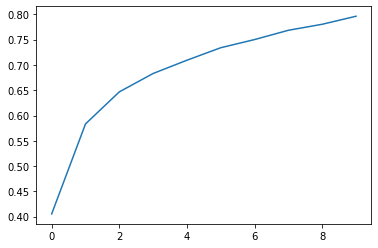

In [32]:
plt.plot(history.history['accuracy'])

In [33]:
prediction=model.predict(x_test)

In [47]:
print(np.argmax(np.round(prediction[10])))

0


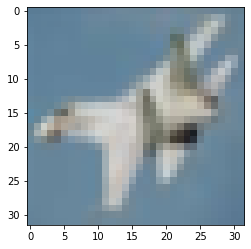

In [48]:
my_image=x_test[10]
plt.imshow(my_image)